In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [245]:
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [248]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# EDA

## Univariate Analysis

In [249]:
dfg = df.groupby(['Age','Clicked on Ad']).aggregate({'Daily Time Spent on Site':'count'}).rename(columns={'Daily Time Spent on Site': 'Jumlah'}).reset_index()
dfg1 = df.groupby(['Age']).aggregate({'Daily Time Spent on Site':'count'}).rename(columns={'Daily Time Spent on Site': 'Total'}).reset_index()
dfg = pd.merge(dfg, dfg1, on='Age', how='outer')
dfg['Ratio'] = dfg['Jumlah'] / dfg['Total'] * 100

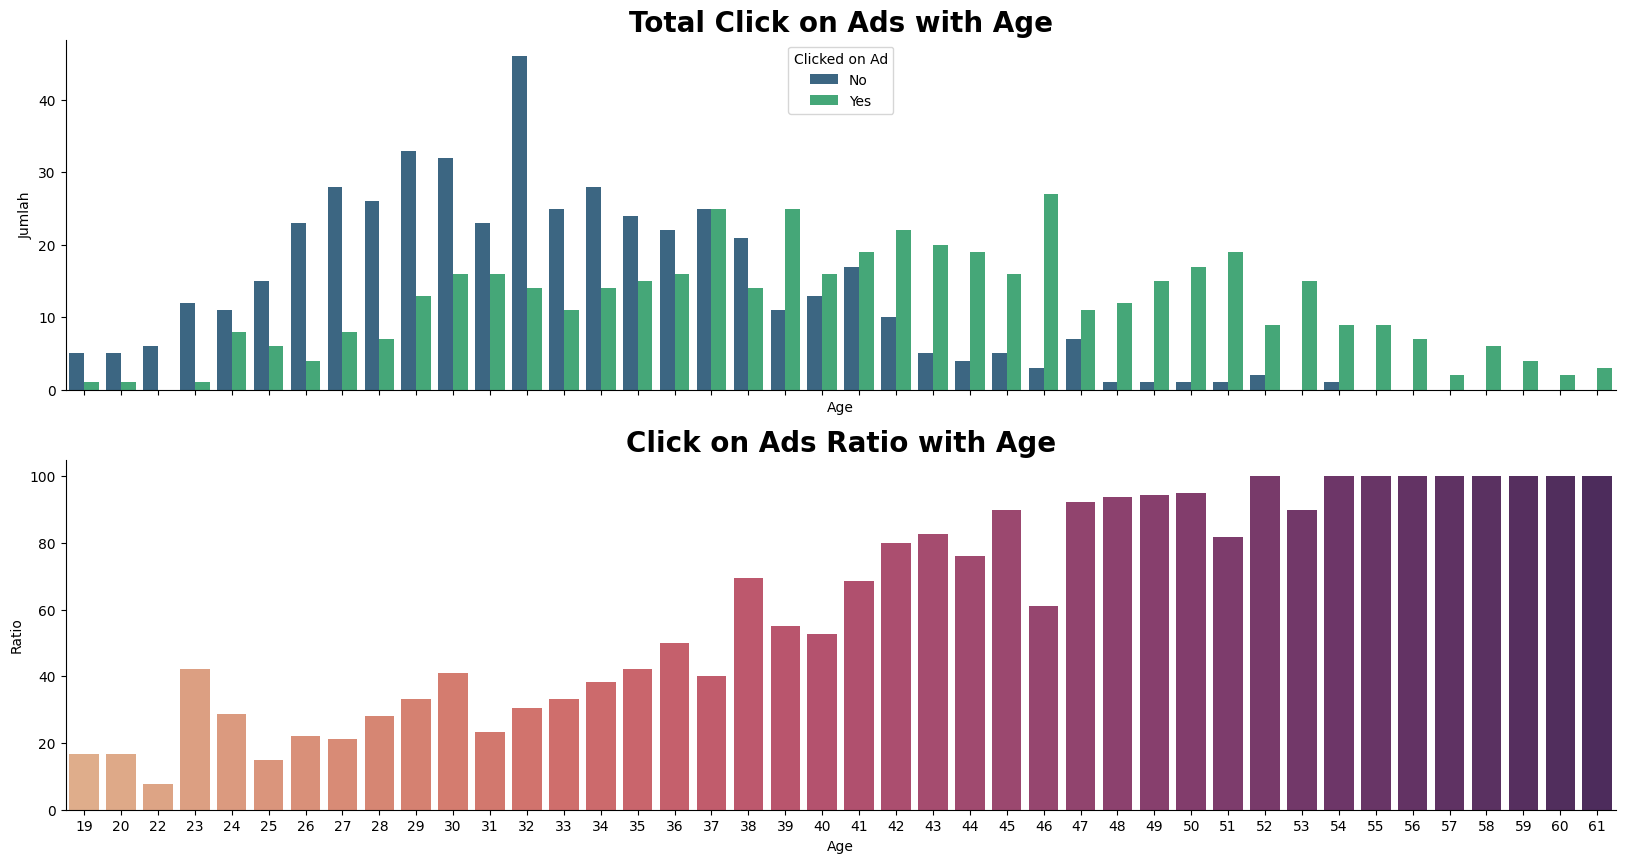

In [250]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(20,10), sharex=True)
sns.barplot(x = 'Age', y = 'Jumlah', data = dfg, hue = 'Clicked on Ad', palette='viridis', ax = ax1)
sns.barplot(y='Ratio', x='Age', data=dfg[dfg['Clicked on Ad'] == 'Yes'], palette='flare', ax=ax2)

ax1.set_title('Total Click on Ads with Age', weight = 'bold', size = 20)
ax2.set_title('Click on Ads Ratio with Age', weight = 'bold', size = 20)

sns.despine()
plt.show()

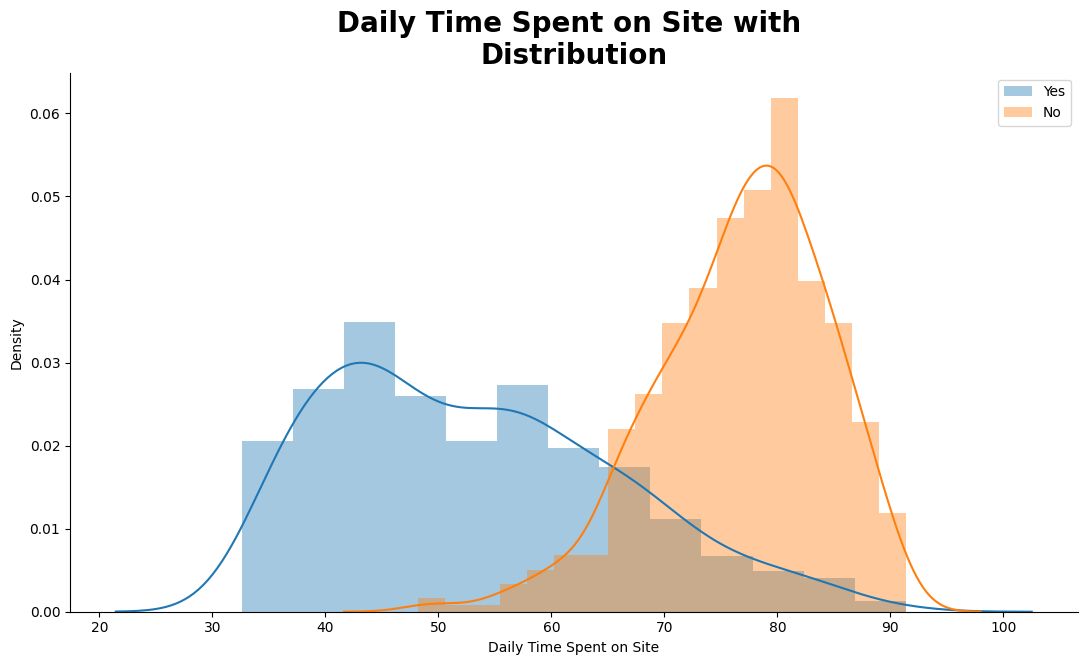

In [251]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

plt.figure(figsize=(13,7))
sns.distplot(yes['Daily Time Spent on Site'], label= 'Yes')
sns.distplot(no['Daily Time Spent on Site'], label='No')
plt.legend()
plt.title('Daily Time Spent on Site with \nDistribution', weight='bold', size = 20)
sns.despine()
plt.show()

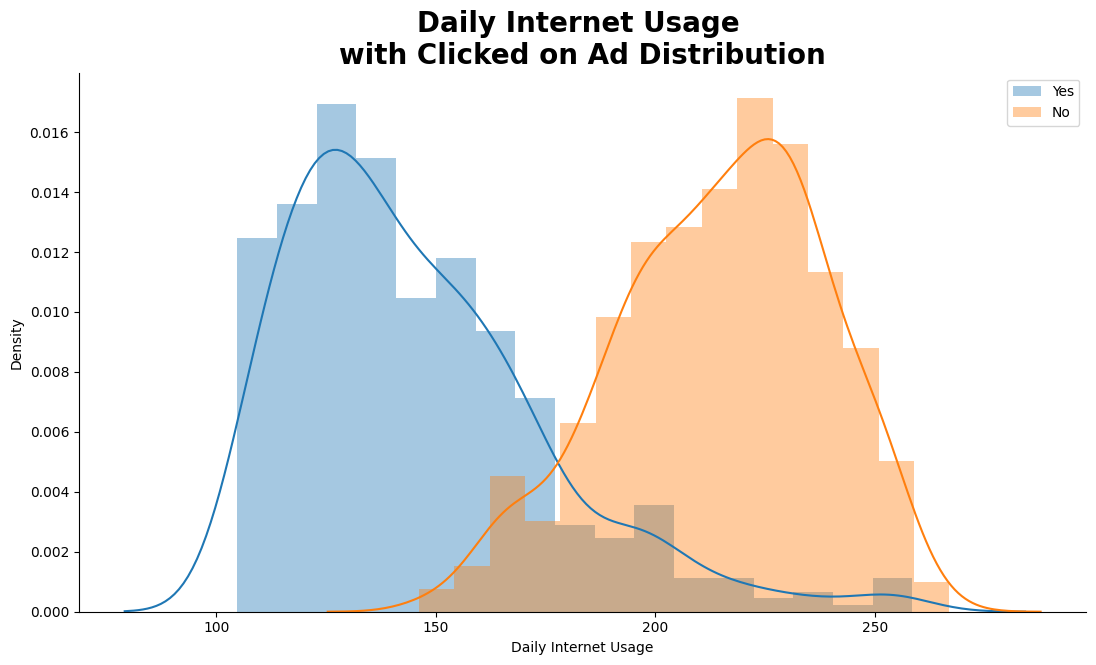

In [252]:
plt.figure(figsize=(13,7))
sns.distplot(yes['Daily Internet Usage'], label= 'Yes')
sns.distplot(no['Daily Internet Usage'], label='No')
plt.legend()
plt.title('Daily Internet Usage \nwith Clicked on Ad Distribution', weight='bold', size = 20)
sns.despine()
plt.show()

## Bivariate Analysis

## Multivariate Analysis

In [253]:
from sklearn.preprocessing import LabelEncoder

def calculate_correlation(dataframe):
    # Mengubah kolom-kolom non-numerik menjadi representasi numerik
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

    correlation_matrix = dataframe.corr()
    return sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')

<Axes: >

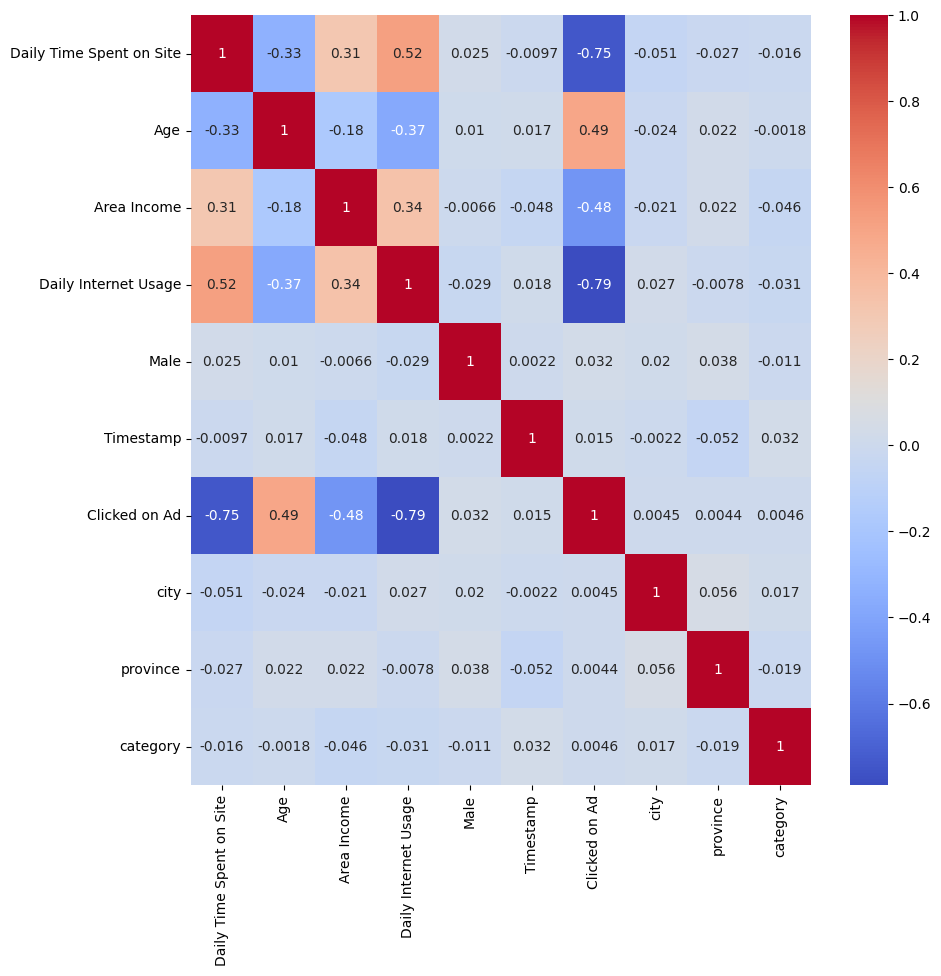

In [254]:
plt.figure(figsize=(10,10))
df_cor = df.copy()
calculate_correlation(df_cor)

# Preprocessing

In [255]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [256]:
for i in ['Yes','No'] :
    df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'] = df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'].fillna(df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'].mean())
    df.loc[df['Clicked on Ad'] == i, 'Area Income'] = df.loc[df['Clicked on Ad'] == i, 'Area Income'].fillna(df.loc[df['Clicked on Ad'] == i, 'Area Income'].mean())
    df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'] = df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'].fillna(df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'].mean())
    
df['Male'] = df['Male'].replace(np.nan, df['Male'].mode()[0])

In [257]:
label_encoder = LabelEncoder()

for i in ['Male','city','Clicked on Ad','province','category'] :
    df[i] = label_encoder.fit_transform(df[i])

In [258]:
x = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Timestamp','city','province','category']]
y = df['Clicked on Ad']

In [259]:
x['Tahun'] = x['Timestamp'].apply(lambda x : x.year)
x['Bulan'] = x['Timestamp'].apply(lambda x : x.month)
x['Tanggal'] = x['Timestamp'].apply(lambda x : x.day)
x['Pekan'] = x['Timestamp'].apply(lambda x : x.week)

x.drop(columns=['Timestamp','Bulan','Tahun'],inplace=True)

# Modeling

In [260]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [261]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_test_norm = X_test.copy()
X_train_norm = X_train.copy()
for i in X_train_norm.columns :
    X_train_norm[i] = minmax.fit_transform(X_train_norm[i].values.reshape(-1, 1))
    X_test_norm[i] = minmax.fit_transform(X_test_norm[i].values.reshape(-1, 1))


In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred),"\n")
    
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")
    
    score = cross_validate(RandomForestClassifier(), x, y, cv=5, scoring='precision', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [263]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(random_state=42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 



roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9660456606885178 



In [264]:
#Logreg Oversampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg_norm = LogisticRegression(random_state=42) # inisiasi object dengan nama logreg
logreg_norm.fit(X_train_norm, y_train) # fit model regression dari data train
eval_classification(logreg_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9677175107256394 



In [265]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

rs_logreg = LogisticRegression(random_state=42)
rs_logreg = RandomizedSearchCV(rs_logreg, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=50)
rs_logreg.fit(X_train, y_train)
eval_classification(rs_logreg)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9658691164015168 



In [266]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

rs_logreg_norm = LogisticRegression(random_state=42)
rs_logreg_norm = RandomizedSearchCV(rs_logreg_norm, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=50)
rs_logreg_norm.fit(X_train_norm, y_train)
eval_classification(rs_logreg_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9657797659307518 



## KNN

In [267]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.66 

Precision (Train Set): 0.80
Precision (Test Set): 0.69 

Recall (Train Set): 0.74
Recall (Test Set): 0.62 

F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.71 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9678038593708698 



In [268]:
knn_norm = KNeighborsClassifier() # inisiasi object dengan nama knn
knn_norm.fit(X_train_norm, y_train) # fit model KNN dari data train
eval_classification(knn_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9638202715277032 



In [269]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs_knn = RandomizedSearchCV(knn, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.68 

Precision (Train Set): 0.78
Precision (Test Set): 0.74 

Recall (Train Set): 0.66
Recall (Test Set): 0.61 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.67 

roc_auc (train-proba): 0.80
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9679305199102888 



In [270]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs_knn_norm = RandomizedSearchCV(knn, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_knn_norm.fit(X_train_norm, y_train)
eval_classification(rs_knn_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9673549385866421 



## Decision Tree

In [271]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93 

Precision (Train Set): 1.00
Precision (Test Set): 0.94 

Recall (Train Set): 1.00
Recall (Test Set): 0.92 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.93 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.967942179540534 



In [272]:
dt_norm = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt_norm.fit(X_train_norm, y_train) # fit model decision tree dari data train
eval_classification(dt_norm)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.52 

Precision (Train Set): 0.49
Precision (Test Set): 0.52 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9640659020246648 



In [273]:
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
rs_dt = DecisionTreeClassifier(random_state=42)
rs_dt = RandomizedSearchCV(rs_dt, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_dt.fit(X_train, y_train)

eval_classification(rs_dt)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.96 

Recall (Train Set): 0.97
Recall (Test Set): 0.92 

F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.95 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9699493408619311 



In [274]:
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
rs_dt_norm = DecisionTreeClassifier(random_state=42)
rs_dt_norm = RandomizedSearchCV(rs_dt_norm, hyperparameters, cv=5, scoring='accuracy',random_state=42)
rs_dt_norm.fit(X_train_norm, y_train)


eval_classification(rs_dt_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.52
roc_auc (test-proba): 0.49 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9658821271978063 



## Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 1.00
Recall (Test Set): 0.95 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.967727521311555 



In [276]:
rf_norm = RandomForestClassifier(random_state=42)
rf_norm.fit(X_train_norm, y_train)
eval_classification(rf_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.52
roc_auc (test-proba): 0.49 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9658691164015168 



In [277]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rs_rf = RandomForestClassifier(random_state=42)
rs_rf = RandomizedSearchCV(rs_rf, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_rf.fit(X_train, y_train)
eval_classification(rs_rf)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.94 

Precision (Train Set): 0.98
Precision (Test Set): 0.94 

Recall (Train Set): 0.97
Recall (Test Set): 0.95 

F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.967780628756357 



In [278]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rs_rf_norm = RandomForestClassifier(random_state=42)
rs_rf_norm = RandomizedSearchCV(rs_rf_norm, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_rf_norm.fit(X_train_norm, y_train)
eval_classification(rs_rf_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9735406306852639 



## AdaBoost

In [279]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train, y_train)
eval_classification(ad)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.97 

Recall (Train Set): 0.98
Recall (Test Set): 0.93 

F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.97 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9640559295883302 



In [280]:
ad_norm = AdaBoostClassifier(random_state=42)
ad_norm.fit(X_train_norm, y_train)
eval_classification(ad_norm)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.52 

Precision (Train Set): 0.49
Precision (Test Set): 0.52 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.52 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9718035711938725 



In [281]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
rs_ad = AdaBoostClassifier(random_state=42)
rs_ad = RandomizedSearchCV(rs_ad, hyperparameters, cv=5, scoring='accuracy',random_state=42)
rs_ad.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ad)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 0.96
Recall (Test Set): 0.94 

F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9641932647184749 



In [282]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
rs_ad_norm = AdaBoostClassifier(random_state=42)
rs_ad_norm = RandomizedSearchCV(rs_ad_norm, hyperparameters, cv=5, scoring='accuracy',random_state=42)
rs_ad_norm.fit(X_train_norm,y_train)

# Predict & Evaluation
eval_classification(rs_ad_norm)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.52 

Precision (Train Set): 0.49
Precision (Test Set): 0.52 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.52
roc_auc (test-proba): 0.52 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9680129771356032 



## XGBoost

In [283]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 1.00
Recall (Test Set): 0.93 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9675727472907436 



In [284]:
xg_norm = XGBClassifier(random_state=42)
xg_norm.fit(X_train_norm, y_train)
eval_classification(xg_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.49
roc_auc (test-proba): 0.51 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9678807760317619 



In [285]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
rs_xg = XGBClassifier(random_state=42)
rs_xg = RandomizedSearchCV(rs_xg, hyperparameters, cv=5, random_state=42, scoring='accuracy')
rs_xg.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 0.99
Recall (Test Set): 0.93 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.97 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.971707169631776 



In [286]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
rs_xg_norm = XGBClassifier(random_state=42)
rs_xg_norm = RandomizedSearchCV(rs_xg_norm, hyperparameters, cv=5, random_state=42, scoring='accuracy')
rs_xg_norm.fit(X_train_norm,y_train)

# Predict & Evaluation
eval_classification(rs_xg_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.48 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.54
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9658326989215453 



# Evaluation

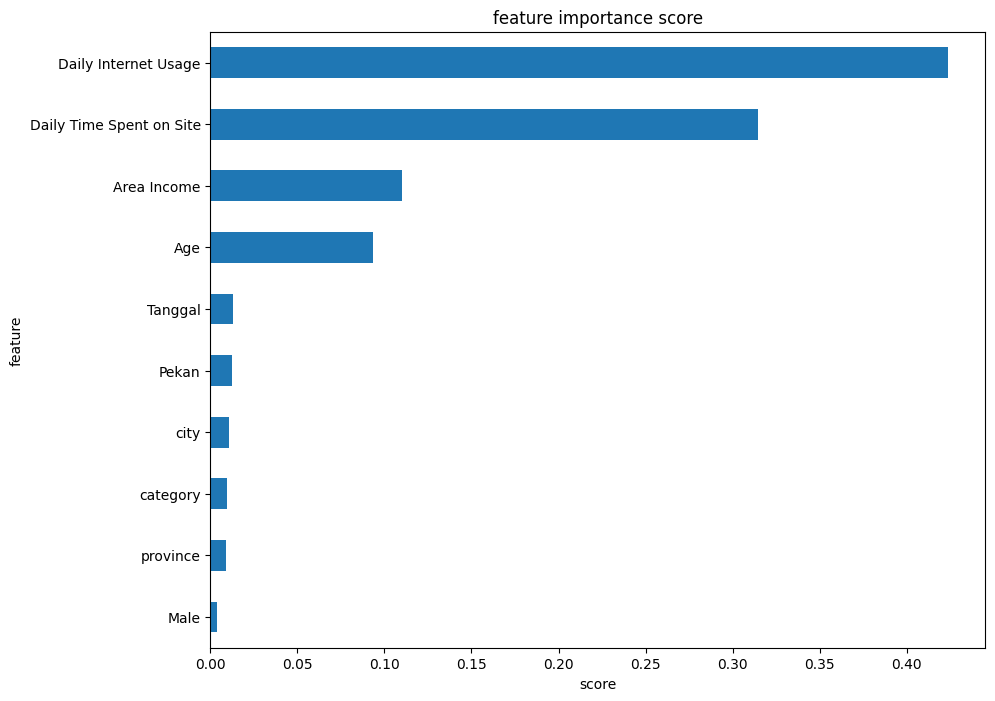

In [287]:
show_feature_importance(rf)

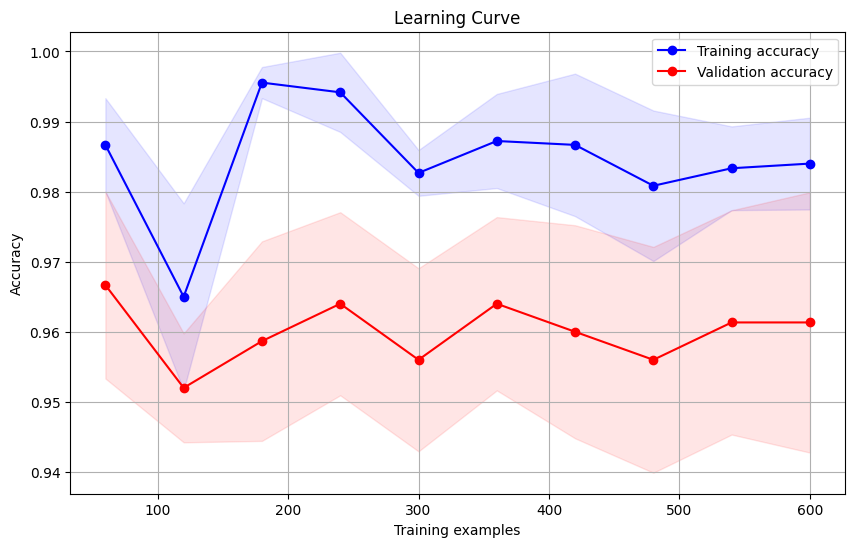

In [288]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='r', label='Validation accuracy')
    
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(rs_rf, X_train, y_train)

In [294]:
train_sizes, train_scores, test_scores = learning_curve(rs_rf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalisasi
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


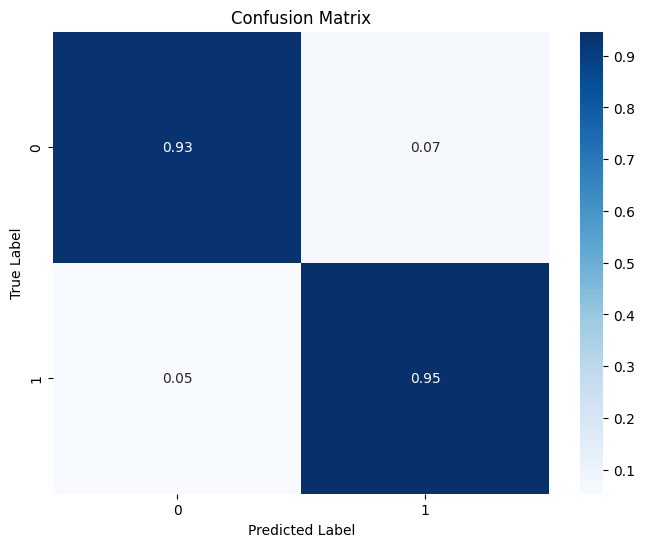

In [291]:
y_pred = rs_rf.predict(X_test)

plot_confusion_matrix(y_test, y_pred, ['0', '1'])